In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [26]:
import os
print(os.getcwd())

/Users/aayushalamichhane/Desktop/DS 256/Assignments/ps05-AayushaLamichhane


In [41]:
# Add the boilerplate code for importing the required packages and data

import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')

In [38]:
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [68]:
'''your code here'''
print(titanic_df.shape[0])
titanic_df.describe()

891


,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,10.000000


Your written answer:

 - 891 passengers are recorded in this log.
 - 64.9% of passengers are male.
 - 38.4% of passengers survived.

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [112]:
'''your code here'''

survived_total = titanic_df.query('Survived == 1')

#Total males and females
total_males = titanic_df.query("Sex == 1").shape[0]
total_females = titanic_df.query("Sex == 0").shape[0]

survived_male = survived_total.query("Sex == 1").shape[0]
survived_female = survived_total.query("Sex == 0").shape[0]

# fOr percentage
male = survived_male / total_males
female = survived_female / total_females

print(male)
print(female)

0.18890814558058924
0.7420382165605095


In [86]:
survived_female = titanic_df.query('Sex == 0 and Survived == 1')
survived_female.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,233.000000,233.0,233.000000
mean,28.600858,51.938573,0.515021,429.699571,1.918455,0.0,0.515021,1.0,1.030043
std,13.296965,64.102256,0.820527,255.048296,0.834211,0.0,0.737533,0.0,1.229644
min,0.750000,7.225000,0.000000,2.000000,1.000000,0.0,0.000000,1.0,0.000000
25%,22.000000,13.000000,0.000000,238.000000,1.000000,0.0,0.000000,1.0,0.000000
50%,27.000000,26.000000,0.000000,400.000000,2.000000,0.0,0.000000,1.0,1.000000
75%,35.500000,76.291700,1.000000,636.000000,3.000000,0.0,1.000000,1.0,2.000000
max,63.000000,512.329200,5.000000,888.000000,3.000000,0.0,4.000000,1.0,6.000000


Your written answer:

 - 74.2% of females survived.
 - 18.9% of males survived.

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [172]:
'''your code here'''

ticket_class_df = titanic_df.groupby('Pclass').agg({'PassengerId': 'count', 'Survived': 'sum'}) #count bc individual id
print(ticket_class_df)

#using total assengers across all classes
ticket_class_df['Ticket_Percentage'] = (ticket_class_df['PassengerId'] / ticket_class_df['PassengerId'].sum()) * 100

#using passengers in each specific class
ticket_class_df['Survivorship_Percentage'] = (ticket_class_df['Survived'] / ticket_class_df['PassengerId']) * 100

print(ticket_class_df)

        PassengerId  Survived
Pclass                       
1               216       136
2               184        87
3               491       119
        PassengerId  Survived  Ticket_Percentage  Survivorship_Percentage
Pclass                                                                   
1               216       136          24.242424                62.962963
2               184        87          20.650954                47.282609
3               491       119          55.106622                24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.11
    - % survivorship: 24.24


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [212]:
'''Your code here'''
titanic_df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [223]:
survived_df = titanic_df.query('Survived == 1')[['Age', 'Name', 'Sex']]
survived_df.head(5)

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [225]:
non_survived_df = titanic_df.query('Survived == 0')[['Age', 'Name', 'Sex']]
survived_df.head(5)

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


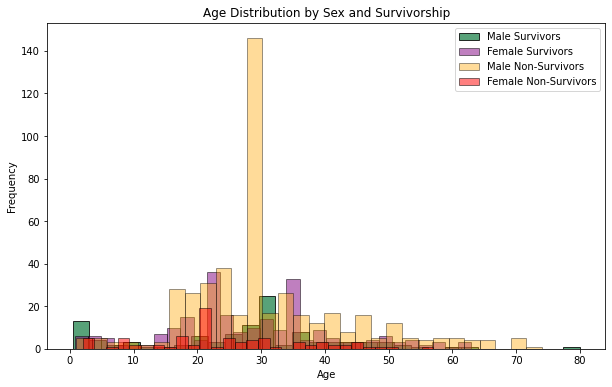

In [332]:
# survivors
male_survivors = survived_df.loc[survived_df['Sex'] == 1, 'Age']
female_survivors = survived_df.loc[survived_df['Sex'] == 0 , 'Age']

# non-survivors
male_non_survivors = non_survived_df.loc[non_survived_df['Sex'] == 1, 'Age']
female_non_survivors = non_survived_df.loc[non_survived_df['Sex'] == 0, 'Age']


# histogram
fig, ax = plt.subplots(1,1,figsize = (10,6))

plt.hist(male_survivors, bins=30, alpha=0.8, label='Male Survivors', color='#2E8B57', edgecolor = 'black')
plt.hist(female_survivors, bins=30, alpha=0.5, label='Female Survivors', color='purple', edgecolor = 'black')
plt.hist(male_non_survivors, bins=30, alpha=0.4, label='Male Non-Survivors', color='orange', edgecolor = 'black')
plt.hist(female_non_survivors, bins=30, alpha=0.5, label='Female Non-Survivors', color='red', edgecolor = 'black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()

# Show plot
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [251]:
import pandas as pd
import numpy as np

In [253]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


In [255]:
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Family_Size']
label = ['Survived']

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler() #have to fit the standard scaler from our training data
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel() #ravel flattens multi dimenensional values into 1D
ys_test = y_test.values.ravel()

In [261]:
Xs_train.shape #712
np.sqrt(712) # pick 25

np.float64(26.68332812825267)

In [263]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)

knn_clf.fit(Xs_train, y_train) 

/Users/aayushalamichhane/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

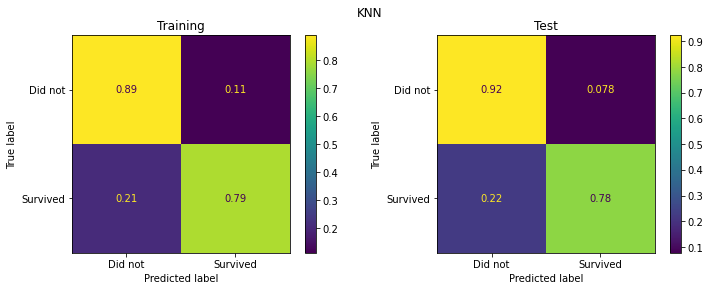

In [265]:
from sklearn.metrics import ConfusionMatrixDisplay

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)


fig, ax = plt.subplots(1,2, figsize = (12, 4))

ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train,
                                        normalize = 'true',
                                        display_labels = ['Did not', 'Survived'],
                                         ax = ax[0])

ConfusionMatrixDisplay.from_predictions(ys_test, y_knn_test,
                                        normalize = 'true',
                                        display_labels = ['Did not', 'Survived'],
                                         ax = ax[1])

ax[0].set_title('Training')
ax[1].set_title('Test')
fig.suptitle('KNN')
plt.show()

                                       

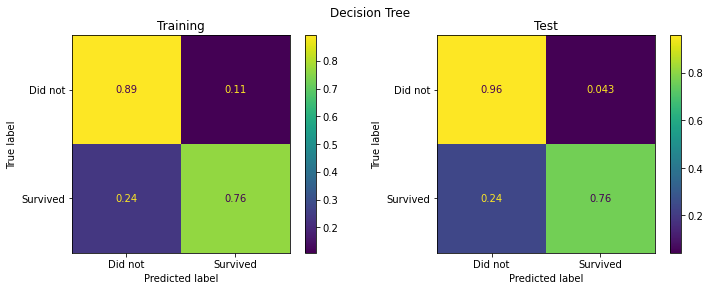

In [267]:
# MODELING WITH DECISION TREE

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(Xs_train, ys_train)

y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)


fig, ax = plt.subplots(1,2, figsize = (12, 4))

ConfusionMatrixDisplay.from_predictions(ys_train, y_tree_train,
                                        normalize = 'true',
                                        display_labels = ['Did not', 'Survived'],
                                       ax = ax[0])

ConfusionMatrixDisplay.from_predictions(ys_test, y_tree_test,
                                        normalize = 'true',
                                        display_labels = ['Did not', 'Survived'],
                                       ax = ax[1])

ax[0].set_title('Training')
ax[1].set_title('Test')
fig.suptitle('Decision Tree')
plt.show()


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 

- Both the Decision Tree and KNN models show similar accuracy on training and test data. The Decision Tree model achieves 89% accuracy on "Did not survive" and 76% on "Survived" in training, improving to 96% on "Did not survive" and maintaining 76% on "Survived" in testing. This indicates slightly better performance on the test data for the Decision Tree model in "Did not survive" cases.

- The KNN model shows steady performance, with 89% accuracy on "Did not survive" and 79% on "Survived" in training, and 92% and 78%, respectively, on the test data. This indicates a slight improvement on the test data for the KNN model.


Which models did you fit and which worked better?
 
 - I fit both a Decision Tree and a K-Nearest Neighbors (KNN) model. While both models performed well, the KNN model showed slightly more consistent results between the training and test sets, making it a more dependable choice for performance across new data.

In [200]:
# hace confusion matrix and then compare them 

In [ ]:
# optimize how well you do in testing 
# make neighborhood bigger, decision